In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
datas = pd.read_csv('bottle.csv')
datas.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# 'T_degC' (Sicaklik),'Salnty' (Tuzluluk) sutunlarini ayiklayalim.
datas_df = datas[['T_degC','Salnty']]

# Sutunları yeniden isimlendirelim.
datas_df.columns = ['Sicaklik', 'Tuzluluk']


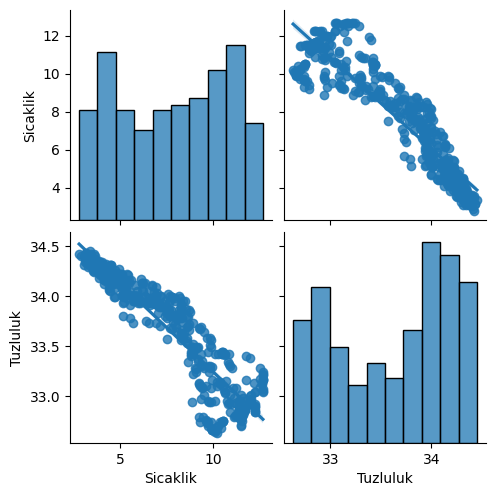

In [12]:
# Verileri inceleyelim
import seaborn as sns
sns.pairplot(datas_df, kind="reg")

In [13]:
datas_df.shape

(500, 2)

In [14]:
# Null veri var mı?
datas_df.isnull().sum()

Sicaklik    1
Tuzluluk    6
dtype: int64

In [15]:
# Null (NaN) verilerin olduğu satırları düşürelim.

datas_df.fillna(method='ffill', inplace=True)
datas_df.isnull().sum()

C:\Users\Asus\AppData\Local\Temp\ipykernel_11152\2904453415.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  datas_df.fillna(method='ffill', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_11152\2904453415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas_df.fillna(method='ffill', inplace=True)


Sicaklik    0
Tuzluluk    0
dtype: int64

In [16]:
# Tuzluluk sütununu X, Sicaklik sütununu Y bileşenleri olarak ayıralım.
X = np.array(datas_df['Tuzluluk']).reshape(-1, 1)
y = np.array(datas_df['Sicaklik']).reshape(-1, 1)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [18]:
# Bu veriseti üzerinde Doğrusal Regresyon uygulayalım.
from sklearn.linear_model import LinearRegression
dogrusal_reg = LinearRegression()

dogrusal_reg.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = dogrusal_reg.predict(X_test)
dogruluk_puani = dogrusal_reg.score(X_test, y_test)
print("Dogrusal Regresyon Modeli Dogruluk Puani: " + "{:.1%}".format(dogruluk_puani))

Dogrusal Regresyon Modeli Dogruluk Puani: 80.5%


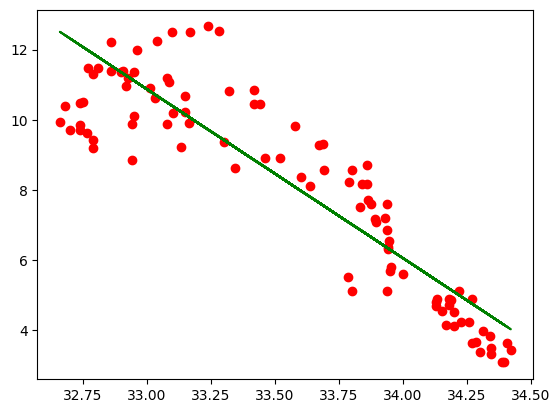

In [20]:
# Doğrusal Regresyon modelini grafiğe dökelim.

plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, y_pred, color='g')
plt.show()

In [21]:
# Veriseti üzerinde 4. dereceden Polinom Regresyon uygulayalım.
# PolynomialFeatures fonksiyonunu çağıralım.
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures fonksiyonu, regresyonda kullanılacak eğitim veri setini belirtilen derecede
# bir polinom olarak algılamak için kullanılan bir ön işleme fonksiyonudur.

poli_reg = PolynomialFeatures(degree = 4) # polinom fonksiyonu tanımlanır.
transform_poli = poli_reg.fit_transform(X_train) # X eğitim verileri bu polinoma uydurulur ve dönüştürülür.


dogrusal_reg2 = LinearRegression() # Şimdi, lineer regresyon fonksiyonumuzu çağırıyoruz.
dogrusal_reg2.fit(transform_poli,y_train) # Bu fonksiyon, polinoma dönüştürülmüş X eğitim verisi ve y eğitim verisi ile uyumlandırılır.

poli_tahmin = dogrusal_reg2.predict(transform_poli) # polinoma dönüştürülmüş X eğitim veri seti üzerine regresyon fonksiyonu ile tahmin gerçekleştirilir.


In [22]:
#polinom_egitim_dogruluk_puani = dogrusal_reg2.score(X_test, y_test)
#print("Polinom Regresyon Modeli Dogruluk Puani: " + "{:.1%}".format(polinom_egitim_dogruluk_puani))
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_train,poli_tahmin))
r2 = r2_score(y_train,poli_tahmin)
print("Test verisi için Kök Karesel Ortalama Hata: " +"{:.2}".format(rmse))
print("Test verisi için R2 Skoru: " +"{:.2}".format(r2))


Test verisi için Kök Karesel Ortalama Hata: 0.8
Test verisi için R2 Skoru: 0.92


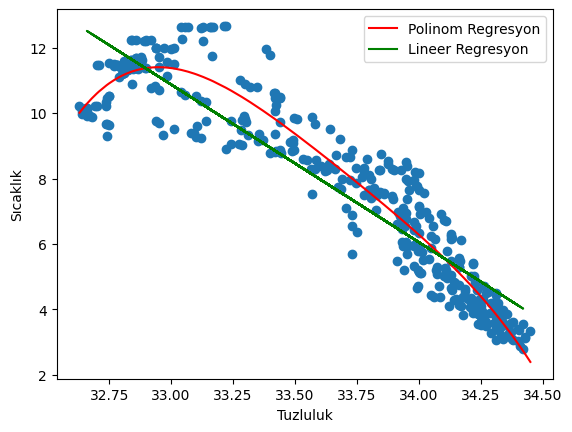

In [23]:
# Eğitim veri seti üzerine tahmini görselleştirelim.
plt.scatter(X_train, y_train)

import operator
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,poli_tahmin), key=sort_axis)
X_train, poli_tahmin = zip(*sorted_zip)
plt.plot(X_train, poli_tahmin, color='r', label = 'Polinom Regresyon')
plt.plot(X_test, y_pred, color='g', label = 'Lineer Regresyon')
plt.xlabel('Tuzluluk')
plt.ylabel('Sıcaklık')
plt.legend()
plt.show()

In [25]:
# Doğrusal Regresyon sonuçlarına göre 33.82 tuzluluk derecesine karşılık gelen bir örneğin sıcaklığını tahmin etmeye çalışalım.

dogrusal_reg.predict([[33.82]])

array([[6.9208366]])

In [26]:
# Polinom Regresyon sonuçlarına göre 110 derece sıcaklıktaki bir örneğin basınç değerini tahmin etmeye çalışalım.
dogrusal_reg2.predict(poli_reg.fit_transform([[33.82]]))

array([[7.44708908]])